## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

# HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [52]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

In [18]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# Wine分類

In [9]:
wine.data.shape
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)
y_pred

array([2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1])

In [11]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


# boston房價預測_Linear Regression

In [35]:
boston.feature_names
# boston.target


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [30]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston.data[:, np.newaxis, 5]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (506, 1)


In [31]:
y_pred

array([16.71271412, 25.07603414, 16.38140487, 14.6800871 , 38.28363266,
       23.75079713, 31.20077813, 21.51222111, 27.64591941, 21.17195756,
       27.8429141 , 24.83426793, 10.82078204, 22.25542835, 21.02868869,
       26.5355857 , 20.09744107, 18.69161533, 12.45046538, 16.42617639,
       19.63181726, 17.41114984, 18.93338154, 24.26119247, 20.14221259,
       21.24359199, 14.14282885, 16.76643995, 23.82243157, 18.54834646,
       21.74503302, 20.98391717, 31.89921385, 18.8527928 , 17.44696706,
       27.12656977, 29.67854644, 35.11380902, 24.10001499, 20.5988821 ,
       34.43328191, 28.46076108, 23.69707131, 27.1802956 , 28.53239551,
       18.10958556, 36.80617249, 20.28548145, 22.85536673, 22.93595546,
       27.72650815])

In [32]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [8.95430408]
Mean squared error: 32.40


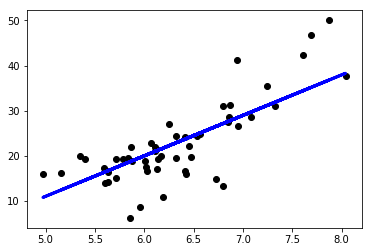

In [33]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

# boston房價預測_Logistic Regression¶

## 回歸問題(房價估測) 轉 分類問題(是否大於房價的mean) 

In [50]:
X = boston.data
Y = boston.target

threshold = Y.mean()
print('threshold: %s'%threshold)
print('predict that the price is > %s or not'%threshold)
# plt.boxplot(y_train)
y_transfer = np.where(Y>threshold, 1, 0)
y_transfer

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, y_transfer, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

threshold: 22.532806324110677
predict that the price is > 22.532806324110677 or not


In [47]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1])

In [51]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9019607843137255
